# 🧩 Notebook 04: Multi-Panel Layouts and Custom Dashboards in Seaborn

In [1]:
# 📦 Setup & Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

# 🧰 Custom utilities
from plot_utils import (
    apply_theme,
    stylize_plot,
    add_reference_line,
    save_fig,
    annotate_points
)

# 🎨 Apply project-wide theme
apply_theme()

print("✅ Seaborn Project Utils Loaded")

✅ Seaborn Project Utils Loaded


In [2]:
# 🔹 Load Dataset: marketing_campaign.csv

campaign = pd.read_csv("../datasets/marketing_campaign.csv")
campaign.head()

,Campaign,Channel,Spend ($),ROI (%)
0,B,Email,1195.37,10.87
1,D,Ads,1964.11,11.10
2,B,Ads,2827.41,8.31
3,A,Ads,6132.99,7.72
4,B,Referral,6318.04,11.37


✅ Plot saved to ../exports/04_dashboards/campaign_pairplot.png


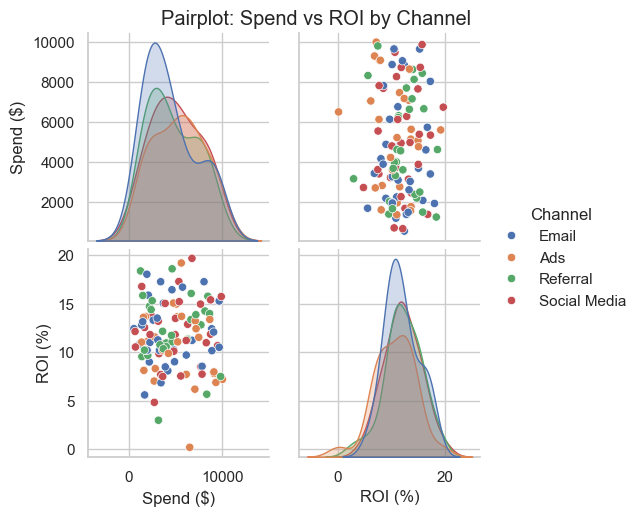

In [3]:
# 📊 Pairplot — Multi-variable Visual Matrix

# Pairplot for ROI, Spend
pairgrid = sns.pairplot(
    campaign,
    hue="Channel",
    vars=["Spend ($)", "ROI (%)"],
    diag_kind="kde",
    height=2.5
)
pairgrid.fig.suptitle("Pairplot: Spend vs ROI by Channel", y=1.02)
save_fig("../exports/04_dashboards/campaign_pairplot.png")

✅ Plot saved to ../exports/04_dashboards/campaign_roi_displot.png


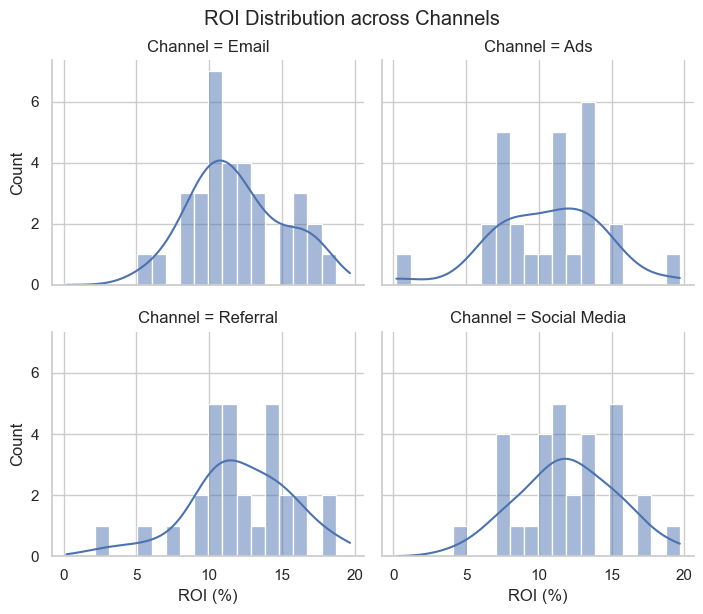

In [4]:
# 📊 Displot — Distribution with Faceting

disgrid = sns.displot(
    data=campaign,
    x="ROI (%)",
    col="Channel",
    col_wrap=2,
    bins=20,
    kde=True,
    height=3,
    aspect=1.2
)
plt.suptitle("ROI Distribution across Channels", y=1.02)
save_fig("../exports/04_dashboards/campaign_roi_displot.png")

✅ Plot saved to ../exports/04_dashboards/campaign_spend_catplot.png


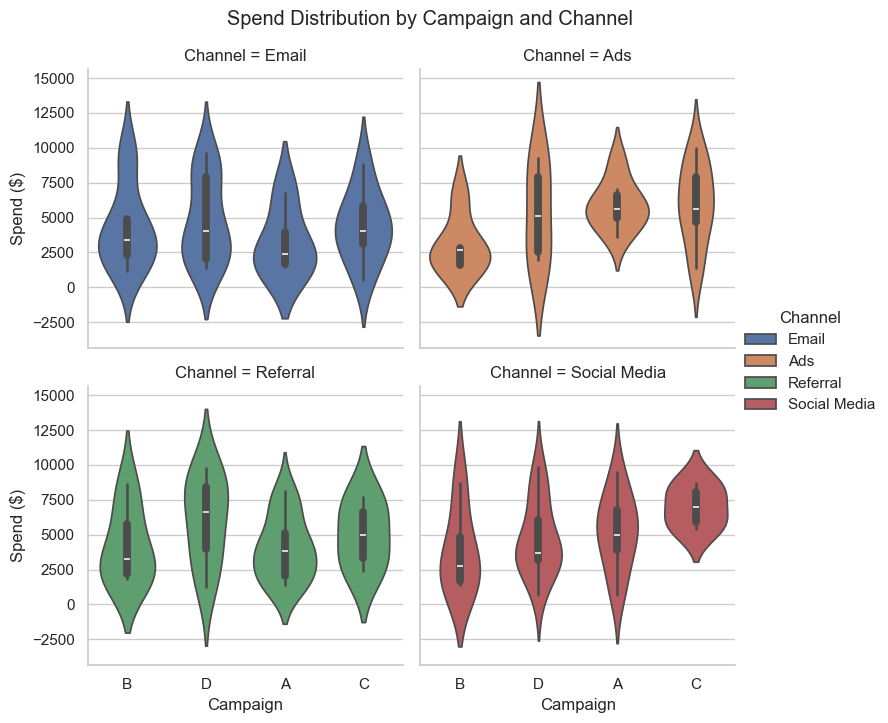

In [5]:
# 📊 Catplot — Combined Violin with Category

catgrid = sns.catplot(
    data=campaign,
    x="Campaign",
    y="Spend ($)",
    kind="violin",
    hue="Channel",
    col="Channel",
    col_wrap=2,
    height=3.5,
    aspect=1.1
)
plt.suptitle("Spend Distribution by Campaign and Channel", y=1.03)
save_fig("../exports/04_dashboards/campaign_spend_catplot.png")

✅ Plot saved to ../exports/04_dashboards/campaign_facetgrid_scatter.png


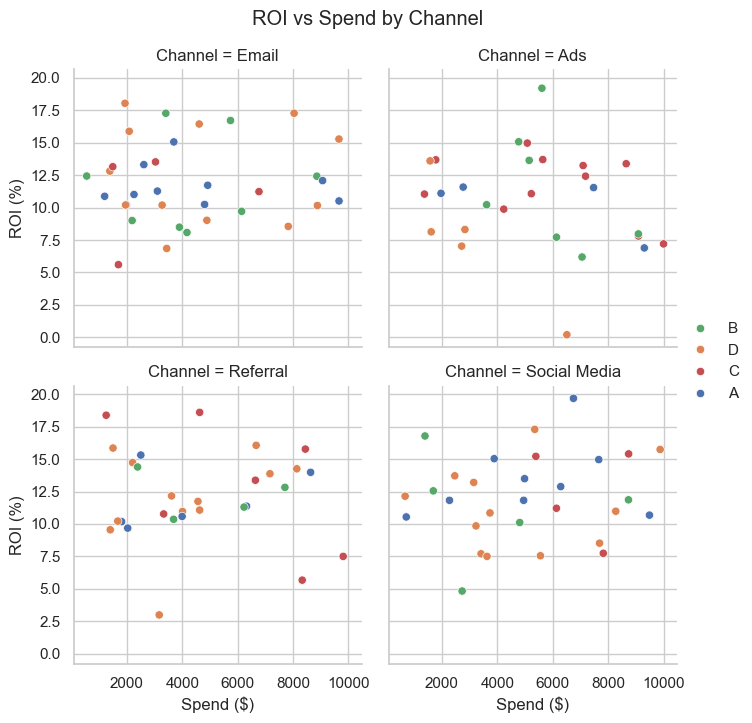

In [6]:
# 📊 FacetGrid — Custom Dashboards

facet = sns.FacetGrid(campaign, col="Channel", col_wrap=2, height=3.5)
facet.map_dataframe(sns.scatterplot, x="Spend ($)", y="ROI (%)", hue="Campaign")

facet.add_legend()
facet.fig.suptitle("ROI vs Spend by Channel", y=1.03)
save_fig("../exports/04_dashboards/campaign_facetgrid_scatter.png")

✅ Plot saved to ../exports/04_dashboards/custom_dashboard_roi_spend.png


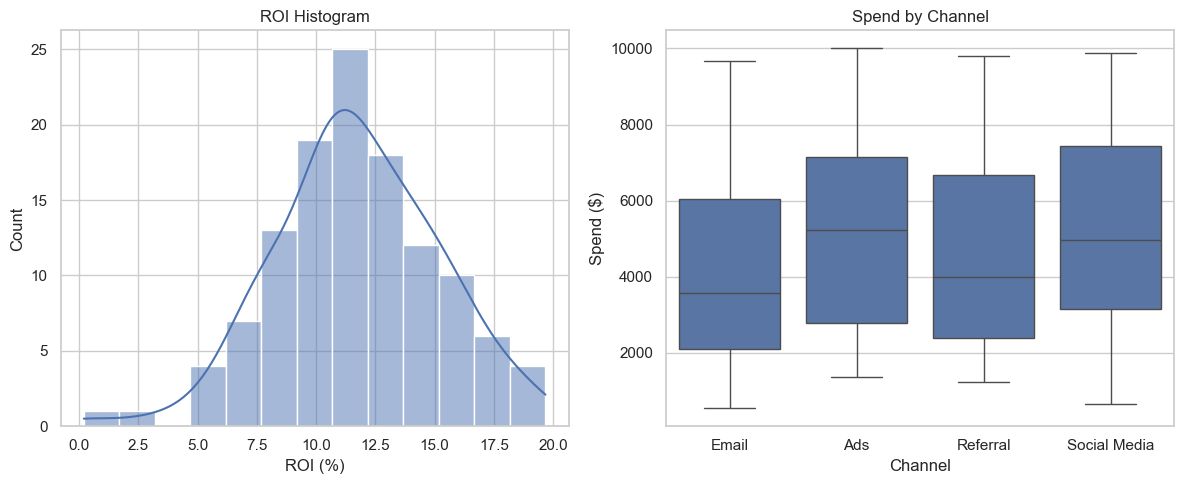

In [7]:
# Custom Layout with plt.subplots

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=campaign, x="ROI (%)", ax=axes[0], kde=True)
sns.boxplot(data=campaign, x="Channel", y="Spend ($)", ax=axes[1])

axes[0].set_title("ROI Histogram")
axes[1].set_title("Spend by Channel")

plt.tight_layout()
save_fig("../exports/04_dashboards/custom_dashboard_roi_spend.png")
plt.show()

# ✅ Summary

In this notebook, we:

- Created multi-panel layouts using `FacetGrid`, `catplot`, and `displot`
- Explored dashboard-style plots with distribution, scatter, and violin charts
- Used `pairplot()` and `subplots()` to compare campaign metrics
- Learned layout tips using `col_wrap`, `aspect`, `height`, and `hue`
- Saved each dashboard to the `exports/plots/` directory